# Solusi Pers. Maxwell 1D metode FDTD di dalam Medium

#### I Wayan Sudiarta, Ph.D.


Pada bagian ini kita menyimulasikan gelombang EM di dalam medium dielektrik linier, permitivitas $\epsilon$ dan konduktivitas $\sigma$, dengan persamaan Maxwell berikut ini.
\begin{align}
\nabla \times \mathbf{E} &= - \frac{\partial \mathbf{B}}{\partial t} \label{eqn-faraday}
\end{align}
\begin{align}
\nabla \times \mathbf{B} &= \mu \mathbf{J} + \mu \epsilon \frac{\partial \mathbf{E}}{\partial t} \label{eqn-amprere}
\end{align}

Kerapatan arus berhubungan dengan konduktivitas yaitu 
\begin{equation}
\mathbf{J} = \sigma \mathbf{E}
\end{equation}. 


Seperti pada kasus di dalam ruang vakum, kita menyimulasikan sebuah gelombang EM bidang yang merambat ke arah sumbu $x$ dengan vektor medan listrik $\mathbf{E} = (0,E_y,0)$ dan medan magnet $\mathbf{B} = (0,0,B_z)$. Persamaan gelombang EM pada medium dielektrik adalah 
\begin{align}
\frac{\partial E_y}{\partial x}  &= - \frac{\partial B_z}{\partial t}
\end{align}
\begin{align}
\frac{\partial B_z}{\partial x}  &= - \mu \sigma E_y - \mu \epsilon \frac{\partial E_y}{\partial t}  
\end{align}

Memindahkan turunan terhadap waktu ke sisi kiri dan turunan ruang ke sisi kanan persamaan, dan setelah manipulasi sederhana diperoleh persamaan 
\begin{align}
\frac{\partial B_z}{\partial t} & = - \frac{\partial E_y}{\partial x}
\end{align}
\begin{align}
\frac{\partial E_y}{\partial t} & = - \frac{1}{\mu\epsilon}\frac{\partial B_z}{\partial x} - \frac{\sigma}{\epsilon} E_y  
\end{align}

Persamaan tanpa dimensinya:
\begin{align}
\frac{\partial B_z}{\partial t} & = - \frac{\partial E_y}{\partial x} \label{eqn-1d3}
\end{align}
\begin{align}
\frac{\partial E_y}{\partial t} & = - \frac{1}{\mu_r\epsilon_r}\frac{\partial B_z}{\partial x} - \frac{\sigma}{\epsilon_r} E_y  \label{eqn-1d4}
\end{align}


Kita menggunakan spasi grid kita menghitung medan listrik pada waktu $t =n \Delta t$ dan posisi $x = i\Delta x$ dan medan magnet pada waktu $t = (n+\frac{1}{2})\Delta t$ dan posisi $x = (i+\frac{1}{2})\Delta x$ dengan $n = 0, 1, 2\ldots$ dan $i = 0, 1, 2, \ldots$.

![Grid EM 1D](gridEM1d.png)

Persamaan numerik (baca di Buku pak Wayan):
\begin{align}
B_z^{n+\tfrac{1}{2}}(i + \tfrac{1}{2}) =  B_z^{n-\tfrac{1}{2}}(i+ \tfrac{1}{2}) -\frac{\Delta t}{\Delta x}\left[E_y^n(i+1) - E_y^n(i)\right]  \label{eqn-num1d3}
\end{align}


\begin{align}
E_y^{n+1}(i) = &\frac{\left[1-\sigma \Delta t /2\epsilon_r\right]}{\left[1 + \sigma \Delta t/2\epsilon_r\right]}  E_y^{n}(i) \nonumber 
\end{align}
\begin{align}
-\frac{\Delta t}{\left[1 + \sigma \Delta t/2\epsilon_r\right] \mu_r\epsilon_r\Delta x}\left[B_z^{n+\tfrac{1}{2}}(i+\tfrac{1}{2}) - B_z^{n+\tfrac{1}{2}}(i-\tfrac{1}{2})\right] \label{eqn-num1d4} 
\end{align}	


Untuk komputasi, kita menggunakan variabel array

\begin{align}
\text{ey[i]} \equiv E_y^{n}(i)
\end{align}
\begin{align}
\text{bz[i]} \equiv B_z^{n+\tfrac{1}{2}}(i+\tfrac{1}{2})
\end{align} 

dan menggunakan 
\begin{align}
& \text{dtdivdx} \equiv \frac{\Delta t}{\Delta x}
\end{align}
\begin{align}
& \text{ce1[i]} \equiv \frac{\left[1-\sigma \Delta t /2\epsilon_r\right]}{\left[1 + \sigma \Delta t/2\epsilon_r\right]}
\end{align}
\begin{align}
& \text{ce2[i]} \equiv \frac{\Delta t}{\mu_r \epsilon_r \Delta x\left[1 + \sigma \Delta t/2\epsilon_r\right]}
\end{align}


Referensi tambahan untuk Kode:
1. https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html 

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math

In [3]:
# Jumlah grid
NX = 400

i = 0
n = 0
ic = NX//2
ip = 100   # posisi gel. pulsa
dx = 0.02

# For stable simulation dt < dx
dt = dx/2.0; 
dtdivdx = dt/dx

freq = 1.0
omega = 2.0*math.pi*freq

# jumlah medium
NM = 2

# array untuk menampung parameter medium
# NM = 2 berarti ada dua indeks medium
# medium 0 dan medium 1
epsR = np.zeros([NM])
epsI = np.zeros([NM])
muR = np.zeros([NM])
sigma = np.zeros([NM])
ce1 = np.zeros([NM])
ce2 = np.zeros([NM])

# array menampung indeks medium
med = np.zeros([NX+1], dtype = int)


In [4]:
nr = 1.33 # ref index of water
ni = 0.0

# setting parameters
# medium 0 
epsR[0]  = 1.0
epsI[0]  = 0.0
muR[0]   = 1.0 
sigma[0] = 0.0

# medium 1
epsR[1]  = nr*nr - ni*ni
epsI[1]  = 2*nr*ni
muR[1]   = 1.0
sigma[1] = omega*epsI[1]

for i in range(NM):
    temp = 1 + 0.5*sigma[i]*dt/epsR[i]
    ce1[i] = (1 - 0.5*sigma[i]*dt/epsR[i])/temp
    ce2[i] = dt/(muR[i]*epsR[i]*dx*temp)


for i in range(NX+1):
    if i < (NX//2): 
        med[i] = 0
    else:
        med[i] = 1


In [5]:
# Posisi Tengah
x0 = ic*dx


# Array nilai x
x = np.arange(NX+1)*dx -x0

In [6]:
# Membuat array zeros sebanyak (N+1) untuk grid
ey = np.zeros([NX+1])
bz = np.zeros([NX+1])

n=0
NT = 100
for n in range(NT):
    n = n + 1
    t = n*dt
    # (2) Update Bz
    for i in range(0,NX-1):
        bz[i] = bz[i] - dtdivdx*(ey[i+1] - ey[i])

    # (3) Generate an EM source
    # (a) a sinusoidal wave
    #bz[ip] = bz[ip] + math.sin(omega*n*dt)
    # (b) an EM pulse
    if n<60:
        bz[ip] = bz[ip] + 2.0*math.exp(-0.005*(n-30.0)*(n-30.0))
    
    # (4) Update Ey
    for i in range(1,NX):
        ey[i] = ce1[med[i]]*ey[i] - ce2[med[i]]*(bz[i] - bz[i-1])


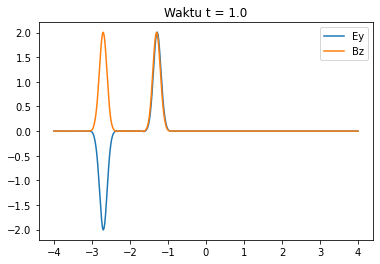

In [7]:
# Hasil setelah 100 iterasi
t = NT*dt
plt.plot(x,ey, label="Ey")
plt.plot(x,bz, label="Bz")
plt.title('Waktu t = '+ str(t))
plt.legend()
plt.show()

In [8]:
# Hitung lagi dan menyimpan hasil
eyt = []
s = []

# Membuat array zeros sebanyak (N+1) untuk grid
ey = np.zeros([NX+1])
bz = np.zeros([NX+1])

n=0
NT = 500
for n in range(NT):
    n = n + 1
    t = n*dt
    # (2) Update Bz
    for i in range(0,NX-1):
        bz[i] = bz[i] - dtdivdx*(ey[i+1] - ey[i])

    # (3) Generate an EM source
    # (a) a sinusoidal wave
    #bz[ip] = bz[ip] + math.sin(omega*n*dt)
    # (b) an EM pulse
    if n<60:
        bz[ip] = bz[ip] + 2.0*math.exp(-0.005*(n-30.0)*(n-30.0))
    
    # (4) Update Ey
    for i in range(1,NX):
        ey[i] = ce1[med[i]]*ey[i] - ce2[med[i]]*(bz[i] - bz[i-1])
    
    # Simpan setiap 10 iterasi untuk visualisasi
    if n%10 == 0:
        eyt.append(list(ey))
        s.append('t = ' + str(t))


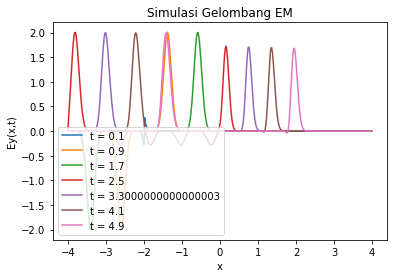

In [9]:
# Visualisasi hasil
for k in range(0,len(eyt),8):
    plt.plot(x,eyt[k])

plt.title('Simulasi Gelombang EM')
plt.xlabel('x')
plt.ylabel('Ey(x,t)')
plt.legend(s[0:len(eyt):8])
plt.show()

## Membuat animasi GIF

In [10]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [11]:
# Create images using plot
for k in range(len(eyt)):
    plt.plot(x,eyt[k])
    # garis pemisah dua medium
    plt.plot([0,0], [-3, 2.5], ':r')
    # teks
    plt.text(-2,2,'Medium 0', fontsize=10)
    plt.text(1,2,'Medium 1', fontsize=10)
    plt.axis('off')
    plt.ylim([-2.5,2.5])
    filename = 'em-wave1dmed' + str(k) + '.png'
    plt.xticks(ticks=None)
    plt.savefig(filename)
    plt.close('all')
    # plt.show()

In [12]:
# Create animated gif
images = []
for i in range(len(eyt)):
    filename = 'em-wave1dmed' + str(i) + '.png'
    images.append(imageio.imread(filename))
imageio.mimsave('em-wave1dmed.gif', images)

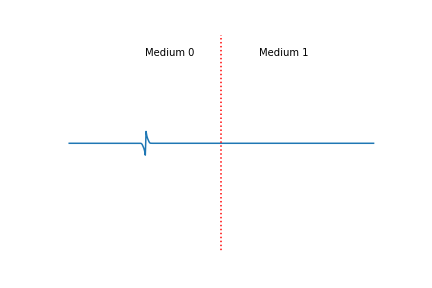

In [13]:
# Show animasi
Image("em-wave1dmed.gif", width=500, height=300)

![simulasi wave](em-wave1dmed.gif)